<a href="https://colab.research.google.com/github/SamPasco2024/stockdata/blob/main/RedGreenWhite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dt = pd.read_csv("https://raw.githubusercontent.com/SamPasco2024/stockdata/main/2min-RGW.csv")
#dataframe = dt.drop("Date", axis =1 )
dt

,Date,Open,High,Low,Close,FW Moving Average 25,RWG
0,5/12/22 12:20,388.750,389.31,388.260,389.1950,389.4085,White
1,5/12/22 12:22,389.195,390.07,388.695,389.7100,389.3806,Green
2,5/12/22 12:24,389.710,389.83,389.290,389.5600,389.3487,White
3,5/12/22 12:26,389.560,390.31,389.450,390.0500,389.3606,Green
4,5/12/22 12:28,390.060,390.83,389.980,390.7135,389.4291,Green
...,...,...,...,...,...,...,...
1610,5/24/22 14:00,391.300,391.68,391.260,391.4700,390.7673,White
1611,5/24/22 14:02,391.470,391.65,390.850,390.9200,390.8159,Red
1612,5/24/22 14:04,390.920,391.22,390.840,391.1000,390.8731,White
1613,5/24/22 14:06,391.100,391.19,390.670,390.9600,390.9145,White


In [2]:
greens = 0
reds = 0
whites = 0
for i in range(len(dt)-1):

  if (dt["RWG"][i] == "Green"):
    greens+=1
  elif (dt["RWG"][i] == "Red"):
    reds+=1
  else:
    whites +=1

print("greens:", greens)
print("reds:", reds)
print("whites:", whites)

greens: 399
reds: 406
whites: 809


In [3]:
redTHENgreen = 0
greenTHENred = 0

for i in range(len(dt)-1):

  if (dt["RWG"][i] == "Red") and (dt["RWG"][i+1] == "Green"):
    redTHENgreen+=1
  
  if (dt["RWG"][i] == "Green") and (dt["RWG"][i+1] == "Red"):
    greenTHENred+=1

print("redTHENgreen:", redTHENgreen)
print("greenTHENred:", greenTHENred)

redTHENgreen: 42
greenTHENred: 40


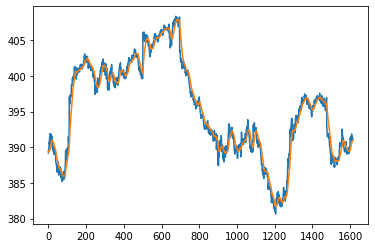

In [4]:
plt.plot(dt['Close'])
plt.plot(dt['FW Moving Average 25'])

In [8]:
#Setting up Variables
bankroll = 25000
betON = False
bankroll_log = []


#For Loop
for i in range(len(dt)-1):
  
  #GOING UP
  #Buying
  if (dt["Close"][i] > dt["FW Moving Average 25"][i] and betON == False):
    bankroll = bankroll - dt["Close"][i]
    betON = True
    print("Buying", dt["Date"][i], " - bankroll: ", bankroll)

    
  #Selling on GreenthenRed
  if (dt["RWG"][i] == "Green") and (dt["RWG"][i+1] == "Red" and betON == True):
    bankroll = bankroll + dt["Close"][i]
    betON = False
    print("\t Selling on GreenthenRed", dt["Date"][i], " - bankroll: ", bankroll)




  #GOING DOWN
  #Shorting
  if (dt["Close"][i] < dt["FW Moving Average 25"][i] and betON == False):
    bankroll = bankroll + dt["Close"][i]
    betON = True
    print("Shorting", dt["Date"][i], " - bankroll: ", bankroll)

  #Buying back on RedthenGreen
  if (dt["RWG"][i] == "Red") and (dt["RWG"][i+1] == "Green" and betON == True):
    bankroll = bankroll - dt["Close"][i]
    betON = False
    print("\t Buying back on RedthenGreen", dt["Date"][i], " - bankroll: ", bankroll)


  bankroll_log.append(bankroll)

Shorting 5/12/22 12:20  - bankroll:  25389.195
	 Selling on GreenthenRed 5/12/22 12:36  - bankroll:  25781.085
Buying 5/12/22 12:38  - bankroll:  25389.844999999998
	 Buying back on RedthenGreen 5/12/22 12:42  - bankroll:  25000.045
Buying 5/12/22 12:44  - bankroll:  24608.684999999998
	 Selling on GreenthenRed 5/12/22 12:58  - bankroll:  25000.245
Shorting 5/12/22 13:00  - bankroll:  25390.715
	 Selling on GreenthenRed 5/12/22 13:32  - bankroll:  25780.275
Shorting 5/12/22 13:32  - bankroll:  26169.835000000003
	 Buying back on RedthenGreen 5/12/22 13:56  - bankroll:  25783.335000000003
Shorting 5/12/22 13:58  - bankroll:  26170.943300000003
	 Selling on GreenthenRed 5/12/22 14:04  - bankroll:  26558.8732
Shorting 5/12/22 14:06  - bankroll:  26945.6732
	 Buying back on RedthenGreen 5/12/22 14:44  - bankroll:  26560.4732
Shorting 5/12/22 14:46  - bankroll:  26946.5432
	 Selling on GreenthenRed 5/12/22 15:42  - bankroll:  27336.4932
Buying 5/12/22 15:44  - bankroll:  26947.3332
	 Sellin

bankroll: 31087.219500000003


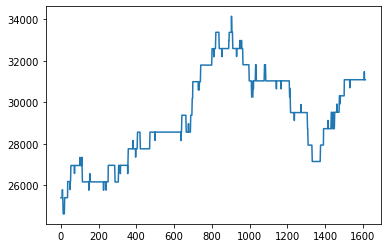

In [6]:
###Plotting bankroll
my_array = np.array(bankroll_log)
print("bankroll:", bankroll)
plt.plot(my_array)